In [31]:
import pandas as pd
from textblob import TextBlob
from textblob_fr import PatternTagger, PatternAnalyzer
from StopWords import STOP_WORDS
#from spacy.lang.fr.stop_words import STOP_WORDS
import re
from textblob import Blobber
from textblob_fr import PatternTagger, PatternAnalyzer
tb = Blobber(pos_tagger=PatternTagger(), analyzer=PatternAnalyzer())

In [32]:
#from spacy.lang.fr.stop_words import STOP_WORDS

In [33]:
df= pd.read_csv('jet privé.csv')
df.head()

,Unnamed: 0,pseado,tweet,lesreaction
0,0,Mickaël Correia@MickaCorreia·2h,"VallJet, le leader français du jet privé, brûl...","6 réponses, 285 Retweets, 442 J'aime"
1,1,Duval Philippe@p_duval·25 août,Un Nice-Cannes (35km) en jet privé.\n\nFin de ...,"163 réponses, 2144 Retweets, 4977 J'aime"
2,2,I Fly Bernard@i_fly_Bernard·21 août,Argument : les milliardaires ont besoin de leu...,"121 réponses, 1046 Retweets, 3166 J'aime"
3,3,BB37000@BB37000_Parodie·22 août,Alerte info\n\nDevant la polémique sur son jet...,"264 réponses, 681 Retweets, 5975 J'aime"
4,4,Agir pour l’Environnement@APEnvironnement·24 août,Interdisons les vols en jets privés ! \n\nSig...,"308 Retweets, 186 J'aime"


In [34]:
df= df.drop(['Unnamed: 0'],axis=1)
df.head()

,pseado,tweet,lesreaction
0,Mickaël Correia@MickaCorreia·2h,"VallJet, le leader français du jet privé, brûl...","6 réponses, 285 Retweets, 442 J'aime"
1,Duval Philippe@p_duval·25 août,Un Nice-Cannes (35km) en jet privé.\n\nFin de ...,"163 réponses, 2144 Retweets, 4977 J'aime"
2,I Fly Bernard@i_fly_Bernard·21 août,Argument : les milliardaires ont besoin de leu...,"121 réponses, 1046 Retweets, 3166 J'aime"
3,BB37000@BB37000_Parodie·22 août,Alerte info\n\nDevant la polémique sur son jet...,"264 réponses, 681 Retweets, 5975 J'aime"
4,Agir pour l’Environnement@APEnvironnement·24 août,Interdisons les vols en jets privés ! \n\nSig...,"308 Retweets, 186 J'aime"


In [35]:
NAN = [(c, df[c].isna().mean()*100) for c in df]
NAN

[('pseado', 0.0), ('tweet', 0.0), ('lesreaction', 9.362549800796813)]

In [36]:
df['lesreaction'] = df['lesreaction'].fillna(0)

In [37]:
NAN = [(c, df[c].isna().mean()*100) for c in df]
NAN

[('pseado', 0.0), ('tweet', 0.0), ('lesreaction', 0.0)]

In [38]:
df["tweet"]= df["tweet"].str.lower()

In [39]:
df.head()

,pseado,tweet,lesreaction
0,Mickaël Correia@MickaCorreia·2h,"valljet, le leader français du jet privé, brûl...","6 réponses, 285 Retweets, 442 J'aime"
1,Duval Philippe@p_duval·25 août,un nice-cannes (35km) en jet privé.\n\nfin de ...,"163 réponses, 2144 Retweets, 4977 J'aime"
2,I Fly Bernard@i_fly_Bernard·21 août,argument : les milliardaires ont besoin de leu...,"121 réponses, 1046 Retweets, 3166 J'aime"
3,BB37000@BB37000_Parodie·22 août,alerte info\n\ndevant la polémique sur son jet...,"264 réponses, 681 Retweets, 5975 J'aime"
4,Agir pour l’Environnement@APEnvironnement·24 août,interdisons les vols en jets privés ! \n\nsig...,"308 Retweets, 186 J'aime"


In [40]:
Untweet=[]
for tweet in df["tweet"].apply(str):
    Word_Tok = []
    for word in  re.sub("\W"," ",tweet ).split():
        Word_Tok.append(word)
    Untweet.append(Word_Tok)

In [41]:
print(Untweet)

[['valljet', 'le', 'leader', 'français', 'du', 'jet', 'privé', 'brûle', 'la', 'planète', 'en', 'toute', 'impunité', 'la', 'firme', 's', 'organise', 'pour', 'ne', 'pas', 'payer', 'ses', 'émissions', 'de', 'co2', 'alors', 'qu', 'elle', 'émet', 'chaque', 'année', 'l', 'équivalent', 'de', '2000', 'ans', 'd', 'empreinte', 'carbone', 'd', 'un', 'français', 'mon', 'enquête', 'sur', 'mediapart'], ['un', 'nice', 'cannes', '35km', 'en', 'jet', 'privé', 'fin', 'de', 'l', 'abondance'], ['argument', 'les', 'milliardaires', 'ont', 'besoin', 'de', 'leur', 'jet', 'privé', 'pour', 'diriger', 'leur', 'groupe', 'et', 'produire', 'de', 'la', 'richesse', 'contre', 'exemple', 'n', '7536', 'aujourd', 'hui', 'nouveau', 'vol', 'martinique', 'saint', 'vincent', 'et', 'les', 'grenadines', 'dans', 'les', 'caraïbes', 'pour', 'l', 'avion', 'du', 'groupe', 'pinault'], ['alerte', 'info', 'devant', 'la', 'polémique', 'sur', 'son', 'jet', 'privé', 'bernard', 'arnault', 's', 'est', 'acheté', 'un', 'tgv', 'privé', 'à', '

In [42]:
df["sansPonctuation"]= Untweet
df.head()

,pseado,tweet,lesreaction,sansPonctuation
0,Mickaël Correia@MickaCorreia·2h,"valljet, le leader français du jet privé, brûl...","6 réponses, 285 Retweets, 442 J'aime","[valljet, le, leader, français, du, jet, privé..."
1,Duval Philippe@p_duval·25 août,un nice-cannes (35km) en jet privé.\n\nfin de ...,"163 réponses, 2144 Retweets, 4977 J'aime","[un, nice, cannes, 35km, en, jet, privé, fin, ..."
2,I Fly Bernard@i_fly_Bernard·21 août,argument : les milliardaires ont besoin de leu...,"121 réponses, 1046 Retweets, 3166 J'aime","[argument, les, milliardaires, ont, besoin, de..."
3,BB37000@BB37000_Parodie·22 août,alerte info\n\ndevant la polémique sur son jet...,"264 réponses, 681 Retweets, 5975 J'aime","[alerte, info, devant, la, polémique, sur, son..."
4,Agir pour l’Environnement@APEnvironnement·24 août,interdisons les vols en jets privés ! \n\nsig...,"308 Retweets, 186 J'aime","[interdisons, les, vols, en, jets, privés, sig..."


In [43]:
stop_words=set(STOP_WORDS)

In [44]:
stop_words
deselect_stop_words = ['n\'', 'ne','pas','plus','personne','aucun','ni','aucune','rien']
for i in deselect_stop_words:
    if i in stop_words:
        stop_words.remove(i)
    else:
        continue

In [45]:
LesTweetFiltre=[]
for i in df["sansPonctuation"]:
    tweetFlitre = [z for z in i if not ((z in stop_words) or (len(z) == 1))]
    LesTweetFiltre.append(' '.join(tweetFlitre))

In [46]:
LesTweetFiltre

['valljet leader français jet privé brûle planète impunité firme organise ne pas payer émissions co2 qu émet année équivalent 2000 ans empreinte carbone français enquête mediapart',
 'nice cannes 35km jet privé fin abondance',
 'argument milliardaires besoin jet privé diriger groupe produire richesse contre exemple 7536 aujourd vol martinique saint vincent grenadines caraïbes avion groupe pinault',
 'alerte info polémique jet privé bernard arnault acheté tgv privé 25 millions euros',
 'interdisons vols jets privés signez pétition https lc cx stopjet légitimement décriés vols jet privé rejettent 14 fois plus gaz serre avions commerciaux fortement émetteurs',
 'vrai jet privé qu symbole abondance',
 'julien bayou propose bannir jets privés réaction personnes ne pas concernées ne prendront jamais jet privé vie hurler dictature verte ridicule riches ne polluent pas crever',
 'bernard arnault propose compenser vols jet privé demandant salariés venir travail vélo climat',
 'retweeté meuf cro

In [47]:
df["TweetFiltré"]=LesTweetFiltre
df.head()

,pseado,tweet,lesreaction,sansPonctuation,TweetFiltré
0,Mickaël Correia@MickaCorreia·2h,"valljet, le leader français du jet privé, brûl...","6 réponses, 285 Retweets, 442 J'aime","[valljet, le, leader, français, du, jet, privé...",valljet leader français jet privé brûle planèt...
1,Duval Philippe@p_duval·25 août,un nice-cannes (35km) en jet privé.\n\nfin de ...,"163 réponses, 2144 Retweets, 4977 J'aime","[un, nice, cannes, 35km, en, jet, privé, fin, ...",nice cannes 35km jet privé fin abondance
2,I Fly Bernard@i_fly_Bernard·21 août,argument : les milliardaires ont besoin de leu...,"121 réponses, 1046 Retweets, 3166 J'aime","[argument, les, milliardaires, ont, besoin, de...",argument milliardaires besoin jet privé dirige...
3,BB37000@BB37000_Parodie·22 août,alerte info\n\ndevant la polémique sur son jet...,"264 réponses, 681 Retweets, 5975 J'aime","[alerte, info, devant, la, polémique, sur, son...",alerte info polémique jet privé bernard arnaul...
4,Agir pour l’Environnement@APEnvironnement·24 août,interdisons les vols en jets privés ! \n\nsig...,"308 Retweets, 186 J'aime","[interdisons, les, vols, en, jets, privés, sig...",interdisons vols jets privés signez pétition h...


In [48]:
senti_list = []
for i in df["TweetFiltré"]:
    vs = tb(i).sentiment[0]
    if (vs > 0):
        senti_list.append('Positive')
    elif (vs < 0):
        senti_list.append('Negative')
    else:
        senti_list.append('Neutral')

In [49]:
senti_list

['Positive',
 'Negative',
 'Positive',
 'Neutral',
 'Positive',
 'Positive',
 'Negative',
 'Neutral',
 'Positive',
 'Positive',
 'Positive',
 'Negative',
 'Positive',
 'Negative',
 'Neutral',
 'Positive',
 'Positive',
 'Neutral',
 'Positive',
 'Neutral',
 'Negative',
 'Neutral',
 'Neutral',
 'Positive',
 'Negative',
 'Positive',
 'Negative',
 'Neutral',
 'Positive',
 'Positive',
 'Neutral',
 'Positive',
 'Neutral',
 'Positive',
 'Negative',
 'Neutral',
 'Neutral',
 'Positive',
 'Negative',
 'Positive',
 'Negative',
 'Neutral',
 'Positive',
 'Neutral',
 'Positive',
 'Positive',
 'Negative',
 'Neutral',
 'Positive',
 'Negative',
 'Positive',
 'Negative',
 'Positive',
 'Positive',
 'Neutral',
 'Neutral',
 'Neutral',
 'Positive',
 'Neutral',
 'Positive',
 'Positive',
 'Negative',
 'Neutral',
 'Positive',
 'Negative',
 'Positive',
 'Negative',
 'Positive',
 'Positive',
 'Neutral',
 'Neutral',
 'Neutral',
 'Positive',
 'Neutral',
 'Positive',
 'Positive',
 'Negative',
 'Neutral',
 'Positive'

In [50]:
df["sentiment"]=senti_list
df.head()

,pseado,tweet,lesreaction,sansPonctuation,TweetFiltré,sentiment
0,Mickaël Correia@MickaCorreia·2h,"valljet, le leader français du jet privé, brûl...","6 réponses, 285 Retweets, 442 J'aime","[valljet, le, leader, français, du, jet, privé...",valljet leader français jet privé brûle planèt...,Positive
1,Duval Philippe@p_duval·25 août,un nice-cannes (35km) en jet privé.\n\nfin de ...,"163 réponses, 2144 Retweets, 4977 J'aime","[un, nice, cannes, 35km, en, jet, privé, fin, ...",nice cannes 35km jet privé fin abondance,Negative
2,I Fly Bernard@i_fly_Bernard·21 août,argument : les milliardaires ont besoin de leu...,"121 réponses, 1046 Retweets, 3166 J'aime","[argument, les, milliardaires, ont, besoin, de...",argument milliardaires besoin jet privé dirige...,Positive
3,BB37000@BB37000_Parodie·22 août,alerte info\n\ndevant la polémique sur son jet...,"264 réponses, 681 Retweets, 5975 J'aime","[alerte, info, devant, la, polémique, sur, son...",alerte info polémique jet privé bernard arnaul...,Neutral
4,Agir pour l’Environnement@APEnvironnement·24 août,interdisons les vols en jets privés ! \n\nsig...,"308 Retweets, 186 J'aime","[interdisons, les, vols, en, jets, privés, sig...",interdisons vols jets privés signez pétition h...,Positive


In [51]:
jaime=[]
reponse=[]
retweets=[]
for i in df["lesreaction"]:
    x=str(i).split()

    if "Retweets," in str(i):
        index=x.index("Retweets,")
        retweets.append(int(x[index-1]))
    else:
        retweets.append(0)

    if "J'aime" in str(i):
        index=x.index("J'aime")
        jaime.append(int(x[index-1]))
    else:
        jaime.append(0)

    if "réponses" in str(i):
        reponse.append(int(x[0]))
        print(x)
    else:
        reponse.append(0)
df["j'aime"]=jaime
df["retweets"]=retweets
df["reponse"]=reponse


['6', 'réponses,', '285', 'Retweets,', '442', "J'aime"]
['163', 'réponses,', '2144', 'Retweets,', '4977', "J'aime"]
['121', 'réponses,', '1046', 'Retweets,', '3166', "J'aime"]
['264', 'réponses,', '681', 'Retweets,', '5975', "J'aime"]
['283', 'réponses,', '1155', 'Retweets,', '6383', "J'aime"]
['121', 'réponses,', '1633', 'Retweets,', '5784', "J'aime"]
['88', 'réponses,', '2524', 'Retweets,', '8055', "J'aime"]
['1575', 'réponses,', '2076', 'Retweets,', '4146', "J'aime"]
['49', 'réponses,', '139', 'Retweets,', '277', "J'aime"]
['52', 'réponses,', '463', 'Retweets,', '1484', "J'aime"]
['2', 'réponses,', '40', 'Retweets,', '158', "J'aime"]
['909', 'réponses,', '707', 'Retweets,', '317', "J'aime"]
['2', 'réponses']
['78', 'réponses,', '352', 'Retweets,', '1065', "J'aime"]
['66', 'réponses,', '62', 'Retweets,', '314', "J'aime"]
['21', 'réponses,', '138', 'Retweets,', '429', "J'aime"]
['52', 'réponses,', '463', 'Retweets,', '1484', "J'aime"]
['7', 'réponses,', '225', 'Retweets,', '623', "J'a

In [52]:
nombreDeSentiment= df.groupby(by=["sentiment"]).count().reset_index().reset_index(drop=True)
nombreDeSentiment.head()


,sentiment,pseado,tweet,lesreaction,sansPonctuation,TweetFiltré,j'aime,retweets,reponse
0,Negative,113,113,113,113,113,113,113,113
1,Neutral,155,155,155,155,155,155,155,155
2,Positive,234,234,234,234,234,234,234,234


<AxesSubplot:xlabel='sentiment'>

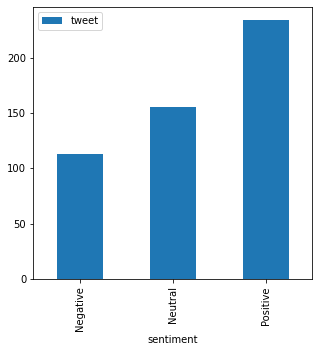

In [53]:
nombreDeSentiment.plot("sentiment","tweet",kind='bar',figsize=(5, 5))

In [54]:
nombreDeSentiment= df.groupby(by=["sentiment"]).sum().reset_index().reset_index(drop=True)
nombreDeSentiment.head()

,sentiment,j'aime,retweets,reponse
0,Negative,35899,11384,3901
1,Neutral,28480,7138,3309
2,Positive,93863,18587,7630


<AxesSubplot:xlabel='sentiment'>

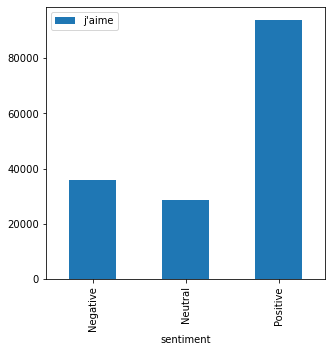

In [55]:
nombreDeSentiment.plot("sentiment","j'aime",kind='bar',figsize=(5, 5))

In [56]:
df

,pseado,tweet,lesreaction,sansPonctuation,TweetFiltré,sentiment,j'aime,retweets,reponse
0,Mickaël Correia@MickaCorreia·2h,"valljet, le leader français du jet privé, brûl...","6 réponses, 285 Retweets, 442 J'aime","[valljet, le, leader, français, du, jet, privé...",valljet leader français jet privé brûle planèt...,Positive,442,285,6
1,Duval Philippe@p_duval·25 août,un nice-cannes (35km) en jet privé.\n\nfin de ...,"163 réponses, 2144 Retweets, 4977 J'aime","[un, nice, cannes, 35km, en, jet, privé, fin, ...",nice cannes 35km jet privé fin abondance,Negative,4977,2144,163
2,I Fly Bernard@i_fly_Bernard·21 août,argument : les milliardaires ont besoin de leu...,"121 réponses, 1046 Retweets, 3166 J'aime","[argument, les, milliardaires, ont, besoin, de...",argument milliardaires besoin jet privé dirige...,Positive,3166,1046,121
3,BB37000@BB37000_Parodie·22 août,alerte info\n\ndevant la polémique sur son jet...,"264 réponses, 681 Retweets, 5975 J'aime","[alerte, info, devant, la, polémique, sur, son...",alerte info polémique jet privé bernard arnaul...,Neutral,5975,681,264
4,Agir pour l’Environnement@APEnvironnement·24 août,interdisons les vols en jets privés ! \n\nsig...,"308 Retweets, 186 J'aime","[interdisons, les, vols, en, jets, privés, sig...",interdisons vols jets privés signez pétition h...,Positive,186,308,0
...,...,...,...,...,...,...,...,...,...
497,Chat chauffe @Chat_Chauffe·21 août,jet privé : les pistes du gouvernement pour st...,0,"[jet, privé, les, pistes, du, gouvernement, po...",jet privé pistes gouvernement stopper abus,Neutral,0,0,0
498,Mathis Sedira-Lemaire @sediralemaire·24 août,"c'est peu judicieux, plutot que d'interdire le...","4 réponses, 1 J'aime","[c, est, peu, judicieux, plutot, que, d, inter...",judicieux interdire jets privés taxons émissio...,Positive,1,0,4
499,Le Parisien | politique@leparisien_pol·23 août,jets : «l’usage privé» représente «une toute p...,"11 réponses, 10 Retweets, 12 J'aime","[jets, l, usage, privé, représente, une, toute...",jets usage privé représente petite partie temp...,Positive,12,10,11
500,reviens France@mcr4s·22 août,encore une idée folle….\njet privé : les piste...,0,"[encore, une, idée, folle, jet, privé, les, pi...",idée folle jet privé pistes gouvernement stopp...,Negative,0,0,0


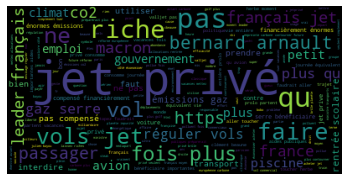

In [57]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
ds=df[df.sentiment=="Positive"]
text = " ".join(i for i in ds.TweetFiltré)
wordcloud = WordCloud().generate(text)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

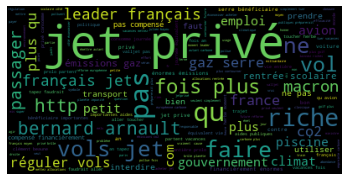

In [58]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
stop=["bmw", "ix", "flow" ]
ds=df[df.sentiment=="Positive"]
text = " ".join(i for i in ds.TweetFiltré)
wordcloud = WordCloud(stopwords=stop).generate(text)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

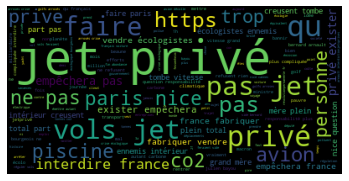

In [59]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
ds=df[df.sentiment=="Negative"]
text = " ".join(i for i in ds.TweetFiltré)
wordcloud = WordCloud().generate(text)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

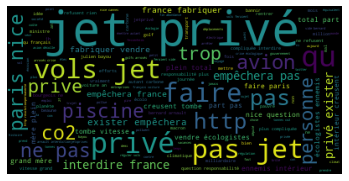

In [60]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
stop=["bmw", "ix", "flow" ]
ds=df[df.sentiment=="Negative"]
text = " ".join(i for i in ds.TweetFiltré)
wordcloud = WordCloud(stopwords=stop).generate(text)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()